<a href="https://colab.research.google.com/github/TheNewLearn/bigdata_hw2/blob/main/sem1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get -y install openjdk-8-jre-headless
!pip install pyspark
#download library
from pyspark.sql import SparkSession
from pyspark import SparkContext
from google.colab import drive
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.cluster import KMeans
#move to google drive
drive.mount('/content/drive')
#setup sparkcore
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libnss-mdns fonts-dejavu-extra fonts-ipafont-gothic fonts-ipafont-mincho
  fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jre-headless
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 28.2 MB of archives.
After this operation, 104 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u275-b01-0ubuntu1~18.04 [28.2 MB]
Fetched 28.2 MB in 3s (10.2 MB/s)
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u275-b01-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u275-b01-0ubuntu1~18.04) ...
Setting up openjdk-8-jre-headless:amd64 (8u275-b01-0ubunt

In [ ]:
class csv:
  def __init__(self,filename):
    self.path = '/content/drive/My Drive/'+filename
    spark = SparkSession.builder.master("local").getOrCreate()
    sc = SparkContext.getOrCreate()
    sqlContext = SQLContext(sc)
    self.df = sqlContext.read.format("csv").options(header=True, inferSchema='True', quotes="\"",escape="\"").load(self.path)
    

  def getpattern(self,name):
    e = {'ID':0,'name':1,'category':2,'main_category':3,'currency':4,'deadline':5,'goal':6,'launched':7,'pledged':8,'state':9,'backers':10,'country':11}
    result = self.df.rdd.map(lambda x:(x[e[name]],1)).reduceByKey(lambda a,b:a+b).collect()
    return sorted(result,key=lambda x:x[1],reverse=True)
  
  def getcount(self,num):
    result = self.df.rdd.filter(lambda x:x[num]).count()
    return result
  
  def state(self):
    result = self.df.rdd.map(lambda x:((x[3],x[9]),1)).reduceByKey(lambda x,y:x+y).collect()
    return sorted(result,key=(lambda x:x[0][1]),reverse=True)
  
  def state_value(self,name,category):
    e = {'ID':0,'name':1,'category':2,'main_category':3,'currency':4,'deadline':5,'goal':6,'launched':7,'pledged':8,'state':9,'backers':10,'country':11}
    total = self.getcount(9)
    result = self.df.rdd.filter(lambda x:x[e[category]] == name).map(lambda x:(x[e[category]],1)).reduceByKey(lambda a,b:a+b).collect()
    return str(math.ceil((result[0][1]/total)*100))+"%"

  def getmedian(self,state,name):
    result = pd.read_csv(self.path,encoding = "ISO-8859-1")
    if state == "median":
      return result[name].median()
    elif state == "mean":
      return result[name].mean()
    elif state == "std":
      return result[name].std()
#mapreduce function
  
    
    
    




    

In [ ]:
kickstart = pd.read_csv("/content/drive/My Drive/ks-projects-201801.csv",encoding = "ISO-8859-1")
kickstart = kickstart.loc[(kickstart.state=='failed') | (kickstart.state =='successful')]

kickstart.groupby('currency')['currency'].count().sort_values(ascending = False).head(5)




currency
USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
Name: currency, dtype: int64

圓形圖

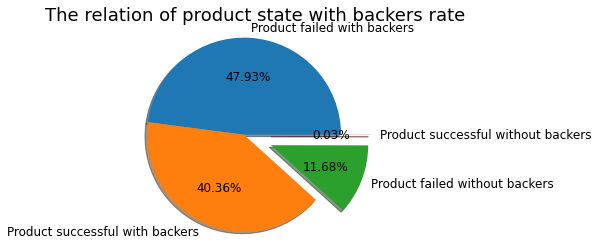

In [ ]:
fail_with_backers = kickstart.loc[kickstart['state']=='failed']
fail_with_backers = fail_with_backers.loc[fail_with_backers.backers>0]
fail_count = len(fail_with_backers)
fail_count = (fail_count/len(kickstart))*100
success_with_backer = kickstart.loc[kickstart['state']=='successful']
success_with_backer = success_with_backer.loc[success_with_backer.backers>0]
swb = len(success_with_backer)
swb = (swb/len(kickstart))*100
fwob = kickstart.loc[kickstart['state']=='failed']
fwob = fwob.loc[fwob.backers<1]
fwobc = len(fwob)
fwobc = (fwobc/len(kickstart))*100
success_without_backers = kickstart.loc[kickstart['state']=='successful']
success_without_backers = success_without_backers.loc[success_without_backers.backers<1]
success_count = len(success_without_backers)
success_count = (success_count/len(kickstart))*100
size = [fail_count,swb,fwobc,success_count]
label = ['Product failed with backers','Product successful with backers','Product failed without backers','Product successful without backers']
separeted = (0, 0, 0.3, 0.3) 
plt.pie(size,                          
        labels = label,                
        autopct = "%1.2f%%",            
        explode = separeted,          
        pctdistance = 0.6,              
        textprops = {"fontsize" : 12},  
        shadow=True)
plt.axis('equal')
plt.title("The relation of product state with backers rate ", {"fontsize" : 18})
plt.show()

Text(0.5, 1.0, 'Meant to be backers box plot')

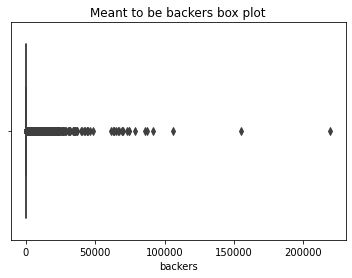

In [ ]:
successdf = kickstart.loc[kickstart['state'] == 'successful']
ax = sns.boxplot(x=successdf["backers"])
ax.set_title("Meant to be backers box plot")

Text(0.5, 1.0, 'The project have backers but failed box plot')

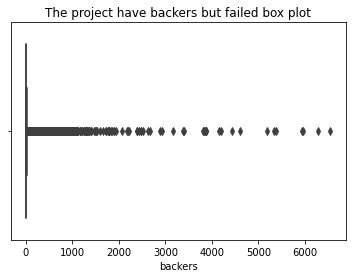

In [ ]:
fail = kickstart.loc[kickstart['state'] == 'failed']
ax = sns.boxplot(x=fail["backers"])
ax.set_title("The project have backers but failed box plot")

country
US    109299
GB     12067
CA      4134
AU      2010
DE       937
Name: country, dtype: int64


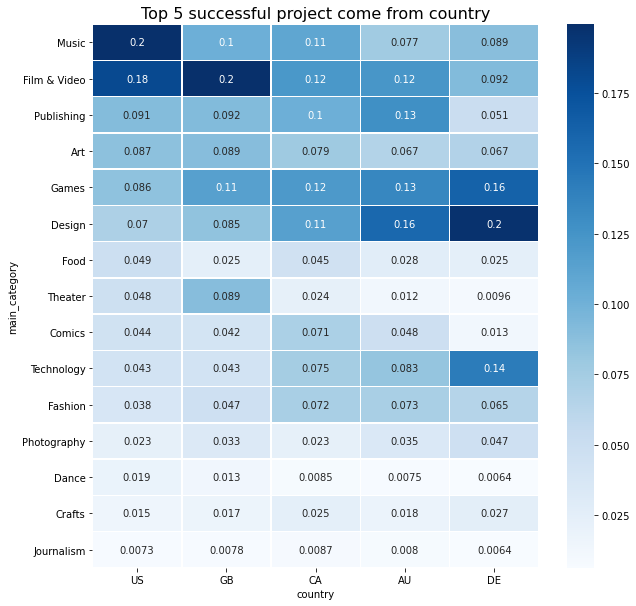

In [ ]:
#Top 5 successful project come from country
successdf = kickstart.loc[kickstart['state']=='successful']
country = successdf.groupby('country')['country'].count().sort_values(ascending = False).head(5)
print(country)
best5 = successdf.loc[(successdf['country'] == "US") | (successdf['country'] == "GB") | (successdf['country'] == "CA") | (successdf['country'] == "AU") | (successdf['country'] == "DE")]
best5_country = pd.crosstab(best5.main_category, best5.country, normalize = "columns")
best5_country = best5_country.sort_values(by =["US"], ascending = False)
best5_country = best5_country[["US", "GB", "CA", "AU", "DE"]] 
fig = plt.subplots(figsize = (10,10))
ax = sns.heatmap(best5_country, annot=True, linewidths=.5, cmap="Blues")
ax.set_title('Top 5 successful project come from country', fontsize = 16)
plt.show()

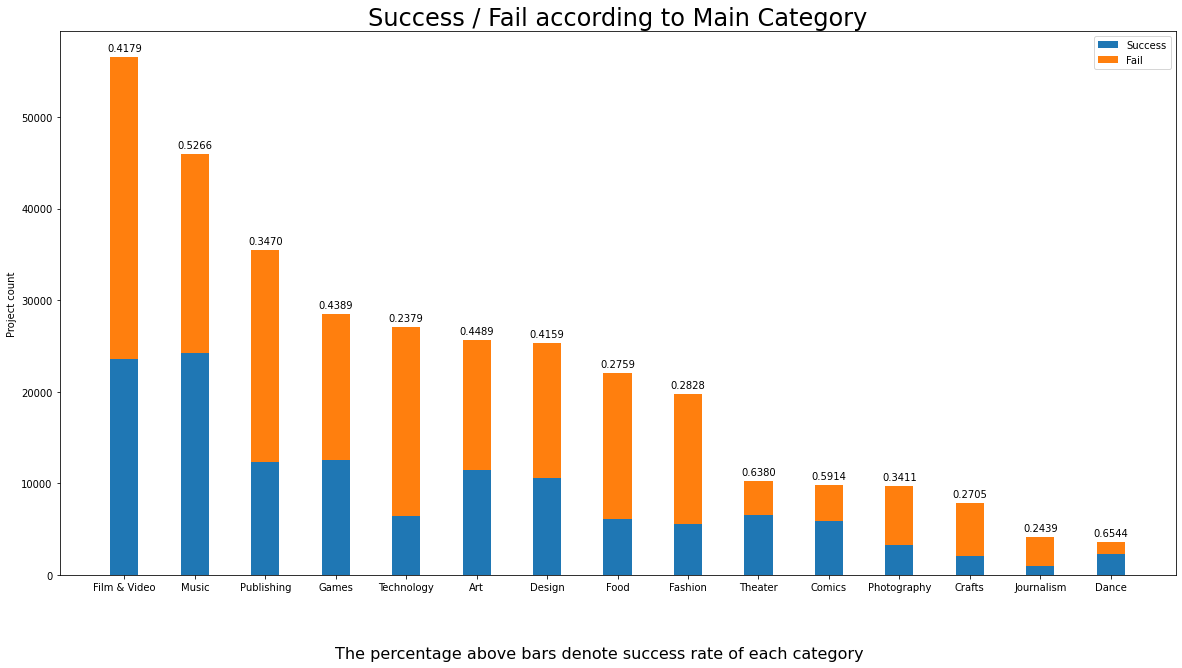

In [ ]:
total_cate =  kickstart.groupby('main_category')['main_category'].count().sort_values(ascending = False)
success_cate = kickstart.loc[kickstart.state == 'successful'].groupby('main_category')['main_category'].count()
fail_cate = kickstart.loc[kickstart.state == 'failed'].groupby('main_category')['main_category'].count()
success_cate = success_cate.reindex(index = total_cate.index)
fail_cate = fail_cate.reindex(index = total_cate.index)
success_rate = success_cate / total_cate
success_rate = success_rate.map(lambda x: '{0:.4f}'.format(x))
total_cate = total_cate.to_frame()
total_cate = total_cate.rename(columns={'main_category': 'count'})
total_cate = total_cate.reset_index()

success_rate = success_rate.to_frame()
success_rate = success_rate.rename(columns={'main_category': 'percentage'})
success_rate = success_rate.reset_index()


Num_cate = kickstart.main_category.nunique()

ind = np.arange(Num_cate)
width = 0.4

fig = plt.subplots(figsize = (20,10))
p1 = plt.bar(ind, success_cate, width)
p2 = plt.bar(ind, fail_cate, width, bottom = success_cate)

plt.ylabel("Project count")
plt.title("Success / Fail according to Main Category", fontsize = 24)
plt.xticks(ind, (success_cate.index))
plt.legend((p1[0], p2[0]), ("Success", "Fail"))

for i in range(Num_cate):
    plt.annotate(str(success_rate.iloc[i][1]), xy= (ind[i], (total_cate.iloc[i][1] + 1500)), ha='center', va='top')

    
txt = "The percentage above bars denote success rate of each category"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=16)
plt.show()

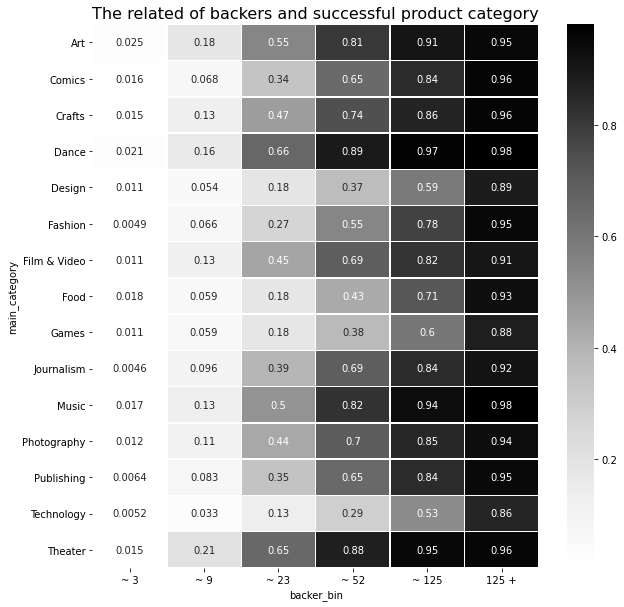

In [ ]:
kickstart['backers_bin'] = "0"
kickstart.loc[(kickstart.backers <= 3), "backer_bin"] = "~ 3"
kickstart.loc[(kickstart.backers > 3) & (kickstart.backers <= 9), "backer_bin"] = "~ 9"
kickstart.loc[(kickstart.backers > 9) & (kickstart.backers <= 23), "backer_bin"] = "~ 23"
kickstart.loc[(kickstart.backers > 23) & (kickstart.backers <= 52), "backer_bin"] = "~ 52"
kickstart.loc[(kickstart.backers > 52) & (kickstart.backers <= 125), "backer_bin"] = "~ 125"
kickstart.loc[(kickstart.backers > 125), "backer_bin"] = "125 +"
backers_count = pd.crosstab(kickstart.main_category, kickstart.backer_bin)
backers_count = backers_count[['~ 3', '~ 9', '~ 23', '~ 52', '~ 125', '125 +']]
success_count = pd.crosstab(kickstart.loc[kickstart['state']=='successful'].main_category, kickstart.loc[kickstart['state']=='successful'].backer_bin)
success_count = success_count[['~ 3', '~ 9', '~ 23', '~ 52', '~ 125', '125 +']]
backers_success_rate = success_count / backers_count
fig = plt.subplots(figsize = (10,10))
ax = sns.heatmap(backers_success_rate, annot=True, linewidths=.5, cmap="Greys")
ax.set_title('The related of backers and successful product category', fontsize = 16)
plt.show()

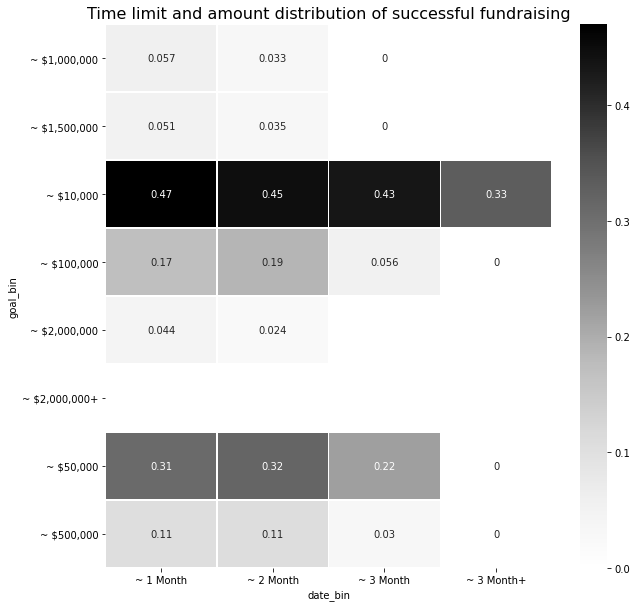

In [ ]:
t1 = kickstart['launched']
t2 = kickstart['deadline']
t1 = pd.to_datetime(t1)
t2 = pd.to_datetime(t2)
kickstart['date_count'] = t2-t1
kickstart['date_count'] = kickstart['date_count'].dt.days
kickstart['date_bin'] = '0'
kickstart.loc[(kickstart.date_count <= 30), "date_bin"] = "~ 1 Month"
kickstart.loc[((kickstart.date_count > 30) &(kickstart.date_count<=60) ), "date_bin"] = "~ 2 Month"
kickstart.loc[((kickstart.date_count > 60) &(kickstart.date_count<=90) ), "date_bin"] = "~ 3 Month"
kickstart.loc[(kickstart.date_count > 90), "date_bin"] = "~ 3 Month+"
kickstart['goal_bin'] = '0'
kickstart.loc[(kickstart.goal <= 10000), "goal_bin"] = "~ $10,000"
kickstart.loc[((kickstart.goal > 10000 ) &(kickstart.goal<=50000) ), "goal_bin"] = "~ $50,000"
kickstart.loc[((kickstart.goal > 50000 ) &(kickstart.goal<=100000) ), "goal_bin"] = "~ $100,000"
kickstart.loc[((kickstart.goal > 100000 ) &(kickstart.goal<=500000) ), "goal_bin"] = "~ $500,000"
kickstart.loc[((kickstart.goal > 500000 ) &(kickstart.goal<=1000000) ), "goal_bin"] = "~ $1,000,000"
kickstart.loc[((kickstart.goal > 1000000 ) &(kickstart.goal<=1500000) ), "goal_bin"] = "~ $1,500,000"
kickstart.loc[((kickstart.goal > 1500000 ) &(kickstart.goal<=2000000) ), "goal_bin"] = "~ $2,000,000"
kickstart.loc[(kickstart.goal > 2000000), "goal_bin"] = "~ $2,000,000+"
goal_count = pd.crosstab(kickstart.goal_bin, kickstart.date_bin)
goal_count = goal_count[['~ 1 Month','~ 2 Month','~ 3 Month','~ 3 Month+']]
success_date_count = pd.crosstab(kickstart.loc[kickstart['state']=='successful'].goal_bin, kickstart.loc[kickstart['state']=='successful'].date_bin)
success_date_count = success_date_count[['~ 1 Month','~ 2 Month','~ 3 Month','~ 3 Month+']]
date_count_rate = success_date_count / goal_count
fig = plt.subplots(figsize = (10,10))
ax = sns.heatmap(date_count_rate, annot=True, linewidths=.5, cmap="Greys")
ax.set_title('Time limit and amount distribution of successful fundraising', fontsize = 16)
plt.show()




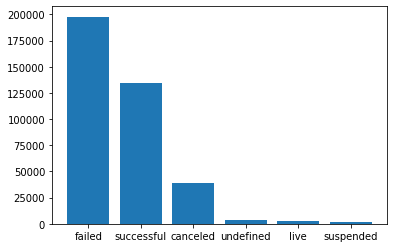

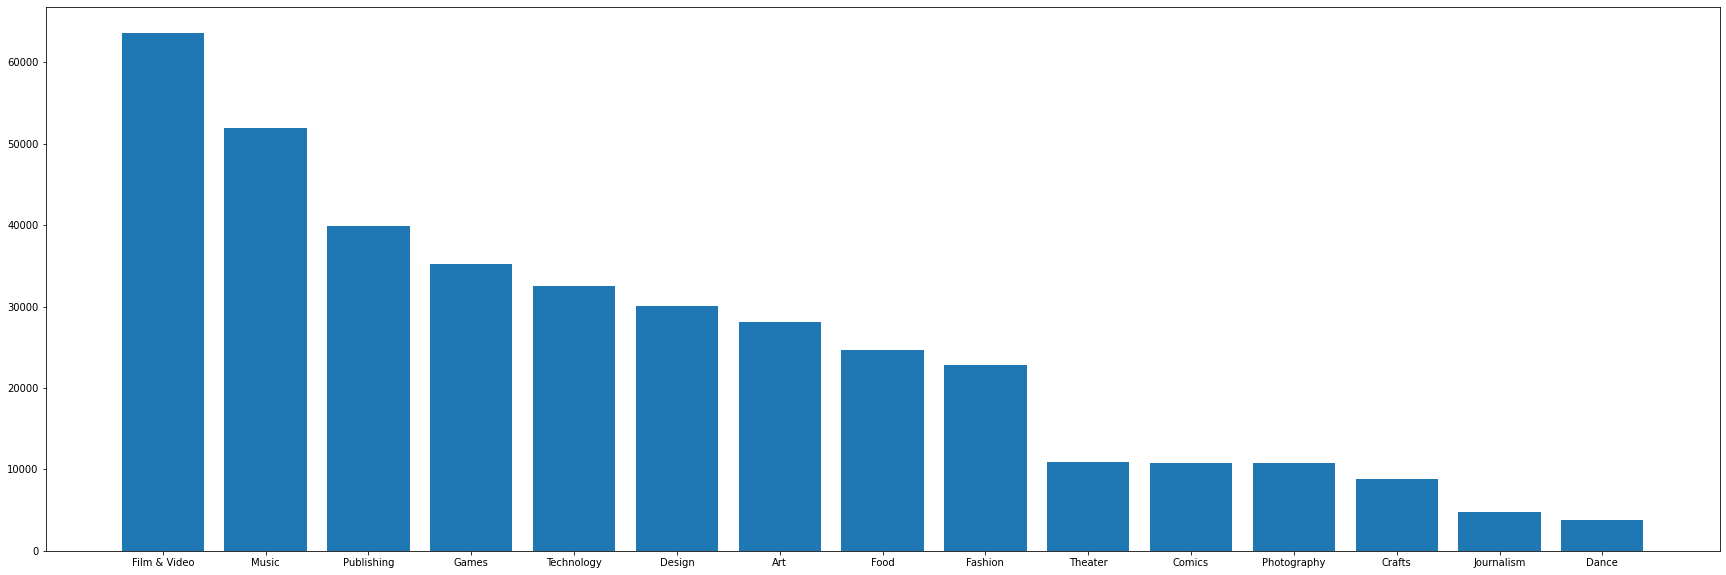

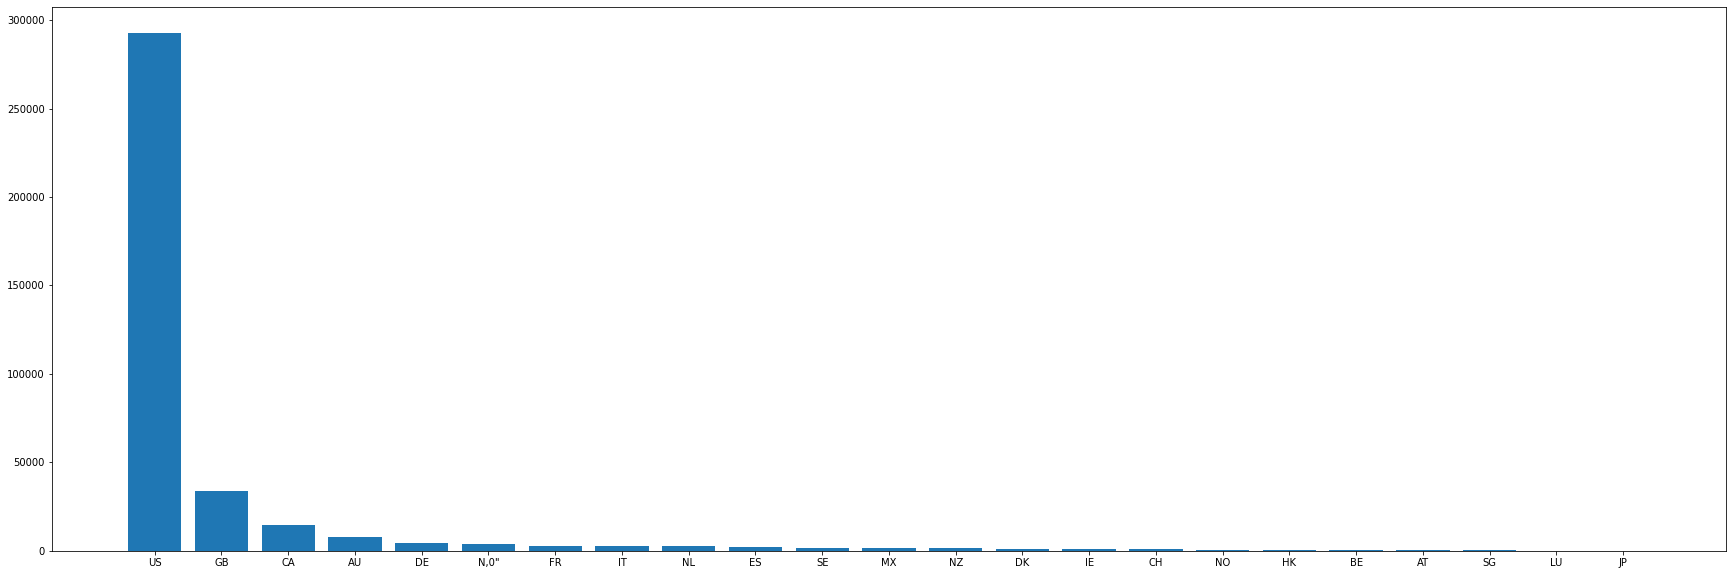

In [ ]:

read = csv("ks-projects-201801.csv")
pattern = read.getpattern("state")
plt.bar([pattern[x][0] for x in range(len(pattern))],[pattern[x][1]for x in range(len(pattern))])
plt.show()



maincate = read.getpattern("main_category")
plt.figure(figsize=(30,10))
plt.bar([maincate[x][0] for x in range(len(maincate))],[maincate[x][1]for x in range(len(maincate))])
plt.show()

country = read.getpattern("country")
plt.figure(figsize=(30,10))
plt.bar([country[x][0] for x in range(len(country))],[country[x][1]for x in range(len(country))])
plt.show()



#success = read.state_value("successful","state")
#fail = read.state_value("failed","state")
#print(count)
#std = read.getmedian("mean","goal")
#print(std)
#read.getpattern("country")




In [ ]:
cateAndstate = read.state()
for i in cateAndstate:
  print(i)

(('Music', 'undefined'), 2234)
(('Film & Video', 'undefined'), 854)
(('Publishing', 'undefined'), 462)
(('Fashion', 'undefined'), 3)
(('Technology', 'undefined'), 3)
(('Design', 'undefined'), 2)
(('Games', 'undefined'), 1)
(('Theater', 'undefined'), 1)
(('Dance', 'undefined'), 1)
(('Photography', 'undefined'), 1)
(('Technology', 'suspended'), 424)
(('Design', 'suspended'), 247)
(('Games', 'suspended'), 220)
(('Food', 'suspended'), 153)
(('Music', 'suspended'), 149)
(('Fashion', 'suspended'), 138)
(('Film & Video', 'suspended'), 117)
(('Art', 'suspended'), 96)
(('Crafts', 'suspended'), 72)
(('Publishing', 'suspended'), 66)
(('Photography', 'suspended'), 55)
(('Journalism', 'suspended'), 52)
(('Comics', 'suspended'), 23)
(('Theater', 'suspended'), 21)
(('Dance', 'suspended'), 13)
(('Music', 'successful'), 24197)
(('Film & Video', 'successful'), 23623)
(('Games', 'successful'), 12518)
(('Publishing', 'successful'), 12300)
(('Art', 'successful'), 11510)
(('Design', 'successful'), 10550)
((